In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('../data/preprocessed/Building_4.csv')
df.head()

,datetime,daylight_savings,indoor_temp,avg_unmet_cooling_temp,indoor_hum,equipment_electric_power_kWh,dhw_heating_kWh,cooling_load_kWh,solar_generation_W_kW,outdoor_temp,...,pred_24h_outdoor_hum,pred_6h_diffuse_solar_W_m2,pred_12h_diffuse_solar_W_m2,pred_24h_diffuse_solar_W_m2,pred_6h_direct_solar_W_m2,pred_12h_direct_solar_W_m2,pred_24h_direct_solar_W_m2,holiday,workday,solar_generation_kW
0,2008-01-02 00:00:00,0,22.02,0.0,55.86,11.7,3.00,1.61,0.0,9.40,...,91.65,-0.00,170.84,0.0,-0.00,5.32,0.0,True,False,0.0
1,2008-01-02 01:00:00,0,21.78,0.0,52.90,7.2,3.36,0.47,0.0,7.61,...,101.62,16.77,112.24,0.0,1.11,2.04,-0.0,True,False,0.0
2,2008-01-02 02:00:00,0,21.77,0.0,50.06,8.1,0.36,0.58,0.0,8.11,...,105.77,40.08,65.93,0.0,1.74,1.04,0.0,True,False,0.0
3,2008-01-02 03:00:00,0,21.81,0.0,47.95,12.4,0.12,1.19,0.0,8.36,...,92.80,65.63,38.59,-0.0,1.09,0.99,0.0,True,False,0.0
4,2008-01-02 04:00:00,0,21.77,0.0,46.91,8.6,0.00,0.59,0.0,8.78,...,100.62,107.26,15.92,0.0,1.78,0.84,0.0,True,False,0.0


In [22]:
# convert datetime to pd datetime format
df.datetime = pd.to_datetime(df.datetime)

In [23]:
# Extract additional features from timestamp column
df_weather = df.assign(
    timestamp = df['datetime'], 
    date = lambda x: x['timestamp'].dt.date,
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear,
    hour = lambda x: x['timestamp'].dt.hour,
)

In [24]:
df_weather.head()

,datetime,daylight_savings,indoor_temp,avg_unmet_cooling_temp,indoor_hum,equipment_electric_power_kWh,dhw_heating_kWh,cooling_load_kWh,solar_generation_W_kW,outdoor_temp,...,holiday,workday,solar_generation_kW,timestamp,date,year,month,day,dayofyear,hour
0,2008-01-02 00:00:00,0,22.02,0.0,55.86,11.7,3.00,1.61,0.0,9.40,...,True,False,0.0,2008-01-02 00:00:00,2008-01-02,2008,1,2,2,0
1,2008-01-02 01:00:00,0,21.78,0.0,52.90,7.2,3.36,0.47,0.0,7.61,...,True,False,0.0,2008-01-02 01:00:00,2008-01-02,2008,1,2,2,1
2,2008-01-02 02:00:00,0,21.77,0.0,50.06,8.1,0.36,0.58,0.0,8.11,...,True,False,0.0,2008-01-02 02:00:00,2008-01-02,2008,1,2,2,2
3,2008-01-02 03:00:00,0,21.81,0.0,47.95,12.4,0.12,1.19,0.0,8.36,...,True,False,0.0,2008-01-02 03:00:00,2008-01-02,2008,1,2,2,3
4,2008-01-02 04:00:00,0,21.77,0.0,46.91,8.6,0.00,0.59,0.0,8.78,...,True,False,0.0,2008-01-02 04:00:00,2008-01-02,2008,1,2,2,4


In [25]:
df_weather.columns

Index(['datetime', 'daylight_savings', 'indoor_temp', 'avg_unmet_cooling_temp',
       'indoor_hum', 'equipment_electric_power_kWh', 'dhw_heating_kWh',
       'cooling_load_kWh', 'solar_generation_W_kW', 'outdoor_temp',
       'outdoor_hum', 'diffuse_solar_W_m2', 'direct_solar_W_m2',
       'pred_6h_outdoor_temp', 'pred_12h_outdoor_temp',
       'pred_24h_outdoor_temp', 'pred_6h_outdoor_hum', 'pred_12h_outdoor_hum',
       'pred_24h_outdoor_hum', 'pred_6h_diffuse_solar_W_m2',
       'pred_12h_diffuse_solar_W_m2', 'pred_24h_diffuse_solar_W_m2',
       'pred_6h_direct_solar_W_m2', 'pred_12h_direct_solar_W_m2',
       'pred_24h_direct_solar_W_m2', 'holiday', 'workday',
       'solar_generation_kW', 'timestamp', 'date', 'year', 'month', 'day',
       'dayofyear', 'hour'],
      dtype='object')

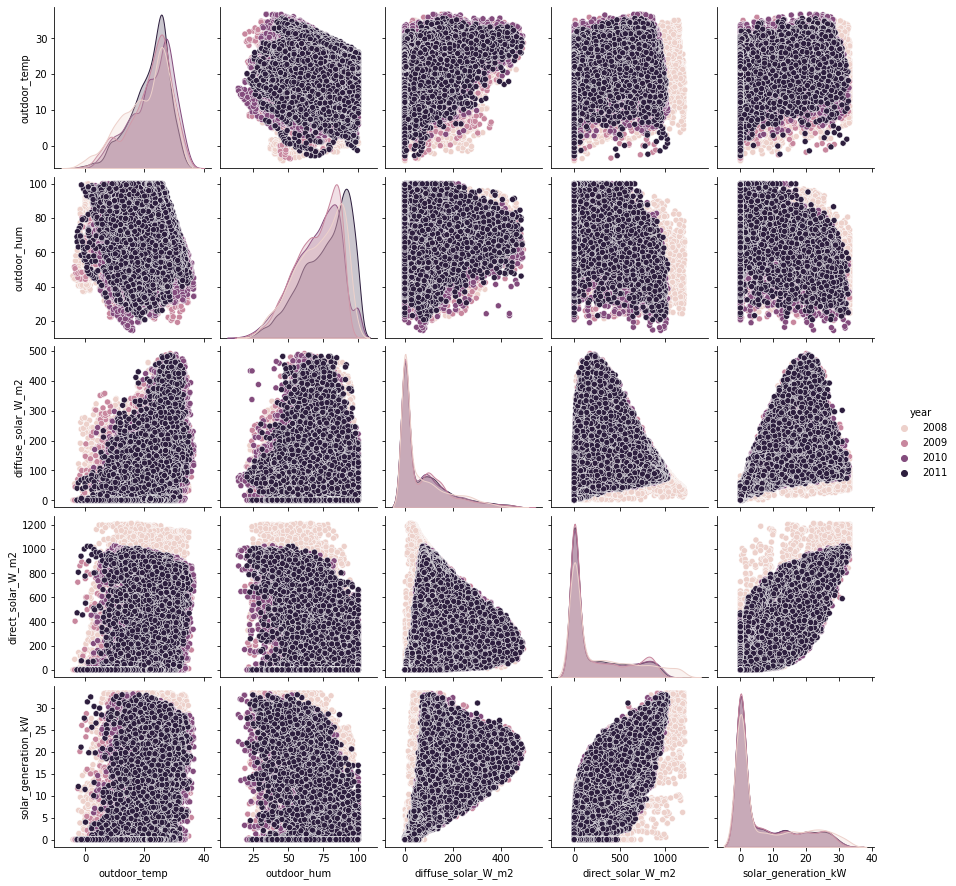

In [26]:
sns.pairplot(data = df_weather[['outdoor_temp',
       'outdoor_hum', 'diffuse_solar_W_m2', 'direct_solar_W_m2',
       'solar_generation_kW', 'year', ]], 
       hue='year'
       )

- direct solar radiation in 2008 (aka 2018) seems to be much stronger then in the other years! no logic explanation found so far 

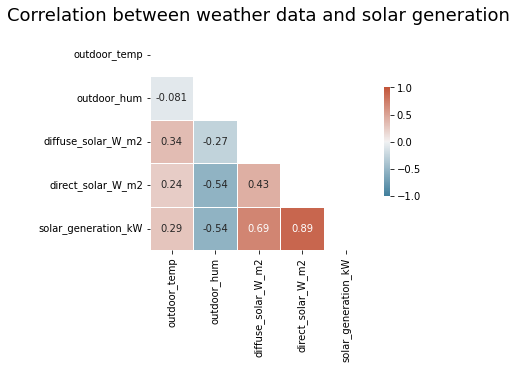

In [66]:
# correlation matrix for weather data + solar generation
corr_weather= df_weather[['outdoor_temp','outdoor_hum', 'diffuse_solar_W_m2', 'direct_solar_W_m2','solar_generation_kW']].corr()
mask = np.triu(np.ones_like(corr_weather, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(corr_weather, mask=mask, cmap=cmap, vmax=1, vmin=-1,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
heatmap.set_title('Correlation between weather data and solar generation', fontdict={'fontsize':18}, pad=12);
#sns.heatmap(corr_weather, vmin=-1, vmax=1, annot=True)

In [34]:
# plotting function
def plotting(feature):
    y = feature
    # plotting hourly temperature data over dayofyear, classified by year
    plt.figure(figsize=(20,5))
    sns.lineplot(data=df_weather,x='dayofyear',y=feature,hue='year',ci=None)

    #smoothing the outdoor temperature data with rolling mean (unif), with centered window, window size: 1 month
    # creating temperature data frame
    df_mean = df_weather[feature]
    rolling_mean = df_mean.rolling(30*24,center=True).mean()

    # plot of smoothed temperature data, classified by year
    plt.figure(figsize=(20,5))
    sns.lineplot(x=df_weather['dayofyear'],y=rolling_mean,hue=df_weather['year'],ci=None)


    #smoothing the outdoor temperature data with rolling mean (unif), with centered window, window size: 1 month
    # creating temperature data frame
    df_mean = df_weather[feature]
    rolling_mean = df_mean.rolling(365*24,center=True).mean()

    # plot of smoothed temperature data, classified by year
    plt.figure(figsize=(20,5))
    sns.lineplot(x=df_weather['date'],y=rolling_mean,ci=None)


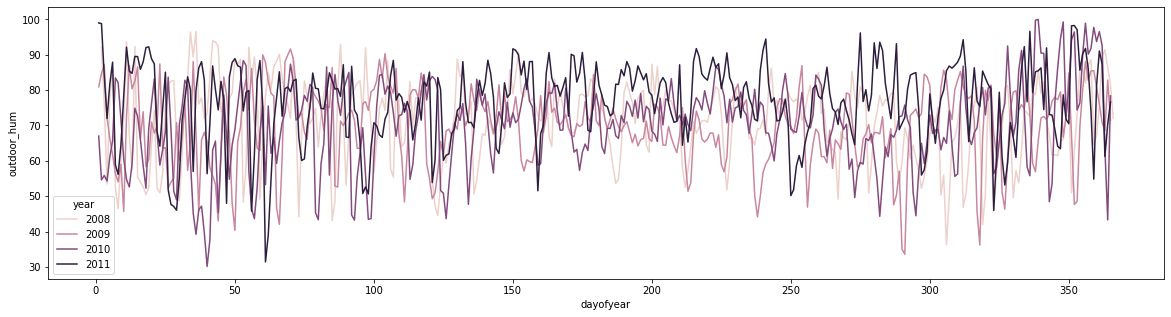

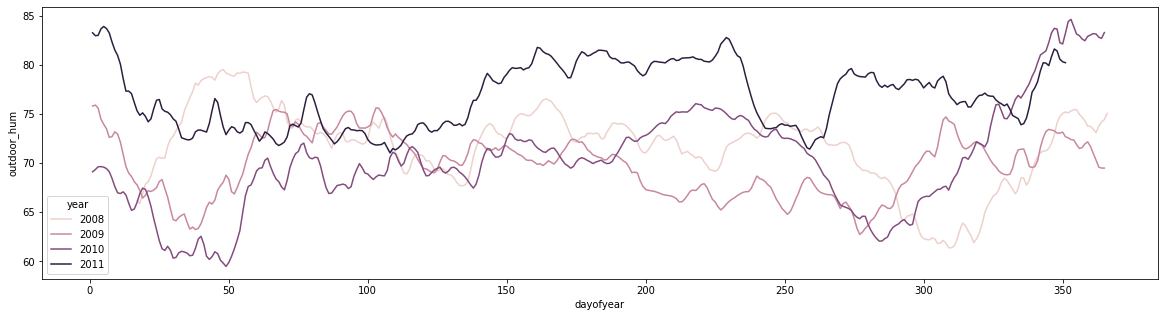

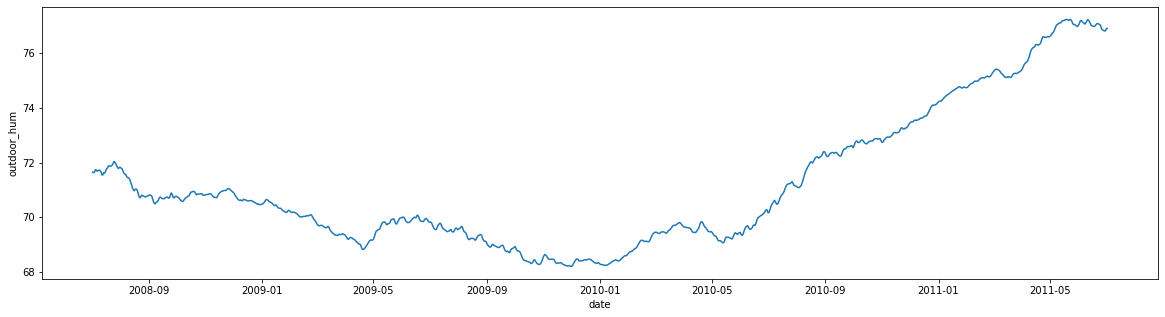

In [35]:
plotting('outdoor_hum')

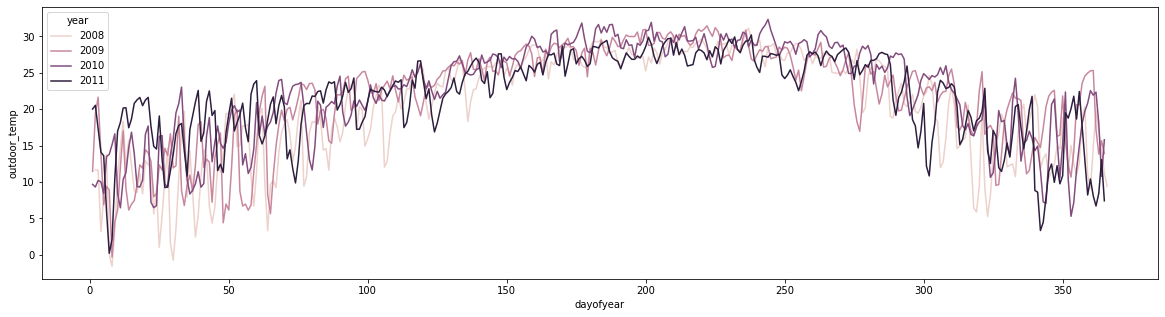

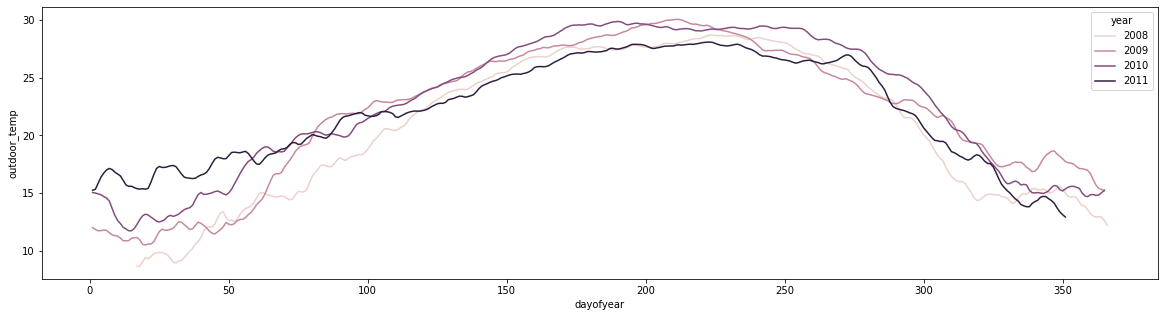

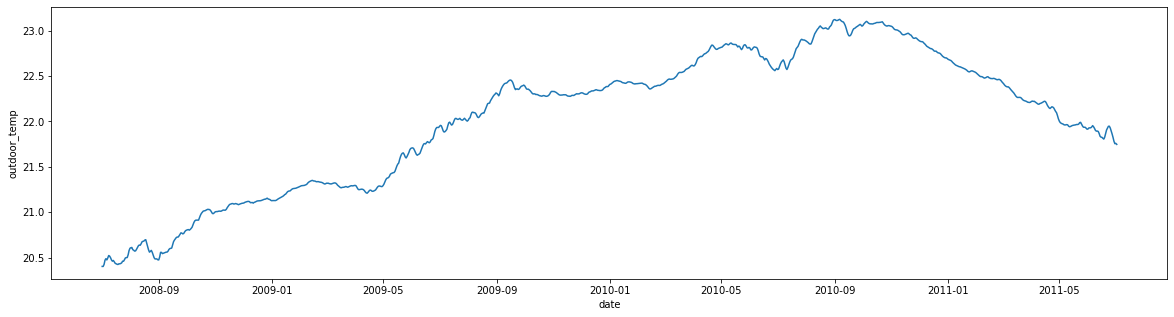

In [36]:
plotting('outdoor_temp')

- In the first 60 days of the year, bigger variance of mean temperature between years: maybe difficult to model precisely.
- 2011 (aka 2021) had the coldest summer and the mildest winter.

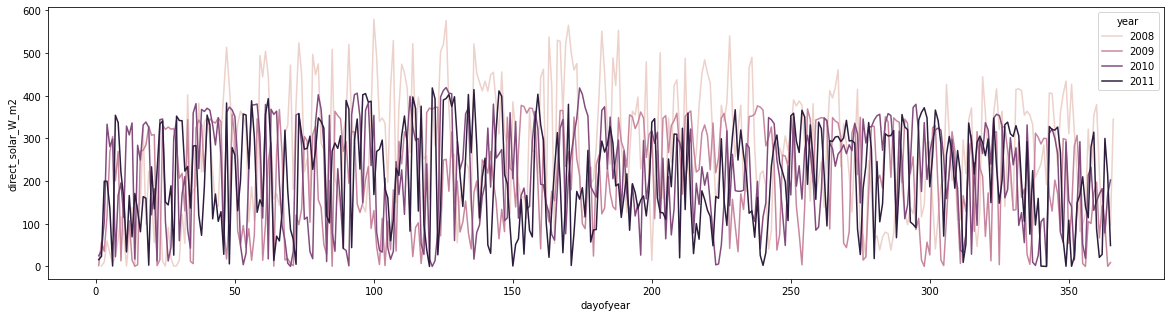

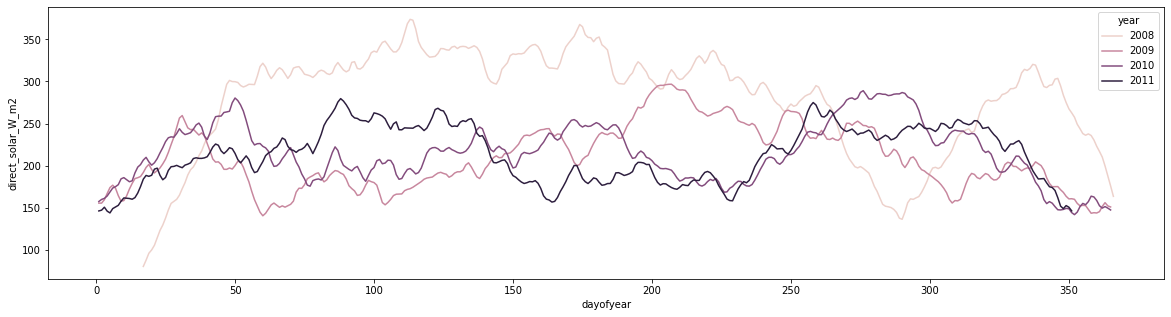

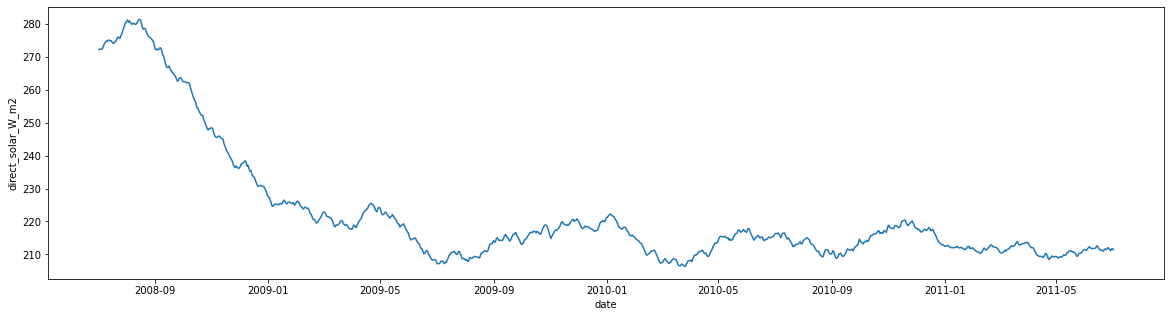

In [37]:
plotting('direct_solar_W_m2')

- direct solar radiation in 2008 is very strong compared to the following years
- convert units from W/m2 to kWh/m2(a): 1 W/m2 * 8760h / 1000 = [kWh/m2(a)]

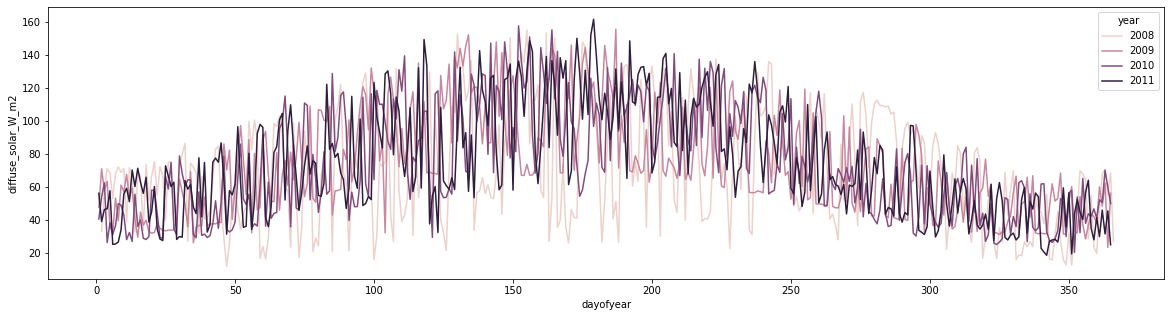

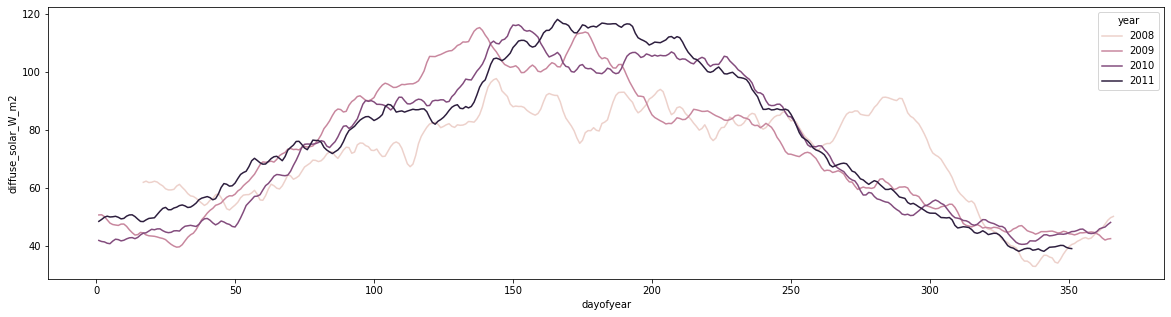

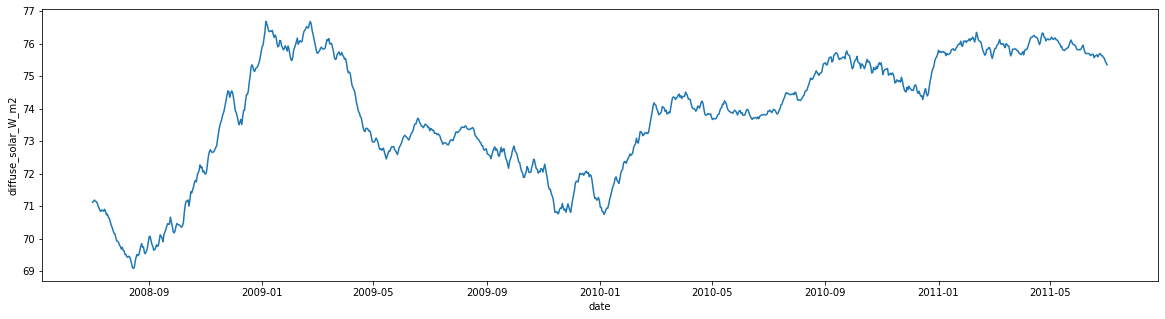

In [40]:
plotting('diffuse_solar_W_m2')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
35035   NaN
35036   NaN
35037   NaN
35038   NaN
35039   NaN
Name: direct_solar_W_m2, Length: 35040, dtype: float64

Text(0.5, 1.0, 'Trend of solar generation (orange) and direct solar radiation (blue)')

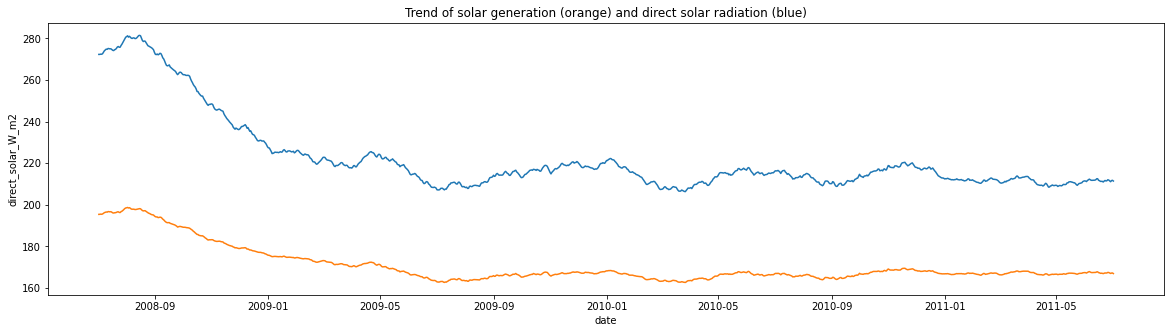

In [77]:
# plot trend of direct solar radiation and solar generation

#smoothing the outdoor temperature data with rolling mean (unif), with centered window, window size: 1 month
# creating temperature data frame
df_mean = df_weather['direct_solar_W_m2']
rolling_mean = df_mean.rolling(365*24,center=True).mean()
df_mean2 = df_weather['solar_generation_W_kW']
rolling_mean2 = df_mean2.rolling(365*24,center=True).mean()
#rolling_mean2['feature']= 'solar_generation_W_kW'
# plot of smoothed temperature data, classified by year
plt.figure(figsize=(20,5))
ax = sns.lineplot(x=df_weather['date'],y=rolling_mean,ci=None)
sns.lineplot(x=df_weather['date'],y=rolling_mean2,ci=None)
ax.set_title('Trend of solar generation (orange) and direct solar radiation (blue)')

In [73]:
df_plot_temp2 = df_weather[(df_weather['dayofyear']>315)]
df_plot_temp2['dayofyear'] = df_plot_temp2['dayofyear']-365#df_plot_temp2.loc[:,'dayofyear']-365
#df['Close_Detrend'] = (df['Close'] - df['Close'].shift(30))
#df_plot_temp = df_weather.shift(-(50*24))
df_plot_temp2.tail()


/var/folders/0k/0tj_r1fd1sd9gfvv0qg5bl_m0000gn/T/ipykernel_39694/3009996509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_temp2['dayofyear'] = df_plot_temp2['dayofyear']-365#df_plot_temp2.loc[:,'dayofyear']-365


,Outdoor Drybulb Temperature [C],Outdoor Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Outdoor Relative Humidity [%],12h Prediction Outdoor Relative Humidity [%],24h Prediction Outdoor Relative Humidity [%],...,12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2],datetime,timestamp,date,year,month,day,dayofyear,hour
35035,4.75,63.25,0.0,0.0,9.55,7.74,3.55,100.33,87.90,68.88,...,282.25,0.0,2011-12-31 19:00:00,2011-12-31 19:00:00,2011-12-31,2011,12,31,0,19
35036,3.55,62.25,0.0,0.0,9.13,8.03,3.60,99.46,89.22,62.01,...,492.87,-0.0,2011-12-31 20:00:00,2011-12-31 20:00:00,2011-12-31,2011,12,31,0,20
35037,2.54,64.25,0.0,0.0,8.60,9.73,3.83,95.39,77.58,58.11,...,390.03,0.0,2011-12-31 21:00:00,2011-12-31 21:00:00,2011-12-31,2011,12,31,0,21
35038,1.45,65.62,0.0,0.0,8.21,10.99,2.50,96.19,66.00,60.51,...,29.79,-0.0,2011-12-31 22:00:00,2011-12-31 22:00:00,2011-12-31,2011,12,31,0,22
35039,0.75,62.88,0.0,0.0,6.99,10.69,1.56,97.80,62.37,59.09,...,0.00,0.0,2011-12-31 23:00:00,2011-12-31 23:00:00,2011-12-31,2011,12,31,0,23


<AxesSubplot:xlabel='dayofyear', ylabel='Outdoor Drybulb Temperature [C]'>

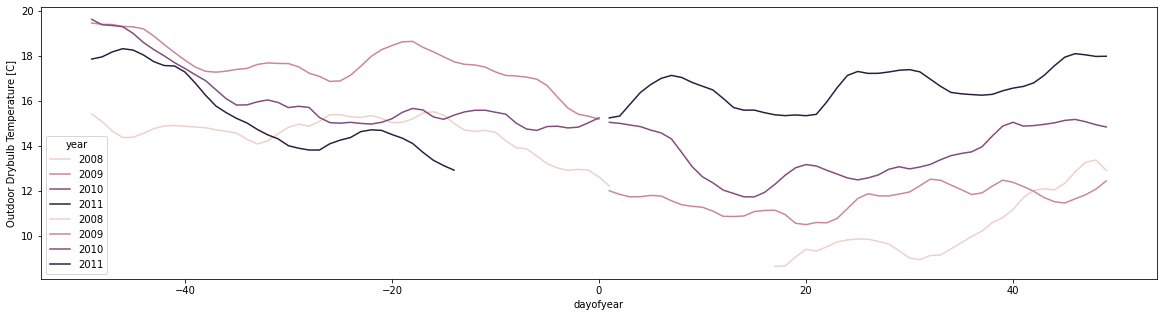

In [74]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df_weather['dayofyear'][(df_weather['dayofyear']<50)],y=temp_mean,hue=df_weather['year'],ci=None)
sns.lineplot(x=df_plot_temp2['dayofyear'],y=temp_mean,hue=df_weather['year'],ci=None)

- winters are getting warmer form 2008 - 2011 (aka 2018-2021)